In [1]:
import pandas as pd

# Load the train.csv file into a DataFrame
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Columns
df['Age'].head()


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [5]:
df[['Sex','Age','Fare']].head()


,Sex,Age,Fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


In [6]:
# Adults only
adults = df[df['Age'] >= 18]
adults[['Survived','Sex','Age','Fare']].head()



,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [7]:
# Combined conditions
df[(df['Sex']=='female') & (df['Pclass']==1)][['Name','Age','Fare']].head()

,Name,Age,Fare
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
11,"Bonnell, Miss. Elizabeth",58.0,26.5500
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,146.5208
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,76.7292


In [8]:
# Top fares
df.sort_values(by='Fare', ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [9]:
#Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp','Parch','FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [10]:
#Find Missing Rows
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
#fill missing information
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


| Data Type | Distribution | Recommended Method |
|---|---|---|
| Numeric | Normal | Mean |
| Numeric | Skewed/Outliers | Median |
| Categorical| Any | Mode |
| Ordinal| Any | Mode or Median|


## Mean Imputation(Average)
When to use:

- Numerical, Continous Data
- Data is normally distributed(symmetric, bell curve)
- You want to preserve the average behavior of the dataset

### *Caution*
 - Sensitive to outliers(can distort the data)
 - can **underestimate variance**

## Median Imputation
When to use:

- Numerical Data
- Data is skewed or contains outliers
- Better reflects "typical" value when dsitribution isnt symmetric

### *Caution*
- Doesnt preserve overall distribution shape as well as mean in symmetric data

## Mode Imputation
When to use:

- Categorical Data (e.g., "red", "blue", "green")
- Ordinal Data (e.g., "low", "medium", "high")
- Also usable for discrete numerical features

### *Caution*

- if there are many tied modes, may choose arbitrarily
- Can distort frequency balance if mode is overly dominat  






In [13]:
# Mean survival by Sex
df.groupby('Sex')['Survived'].mean().sort_values()

,Survived
Sex,
male,0.188908
female,0.742038


In [14]:
# Count and mean survival by Sex and Pclass
df.groupby(['Sex','Pclass'])['Survived'].agg(['count','mean']).sort_values('mean', ascending=False)

count      mean
Sex    Pclass                 
female 1          94  0.968085
       2          76  0.921053
       3         144  0.500000
male   1         122  0.368852
       2         108  0.157407
       3         347  0.135447

In [15]:
# Pivot table: survival rate by Sex (rows) and Pclass (columns)
pd.pivot_table(df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


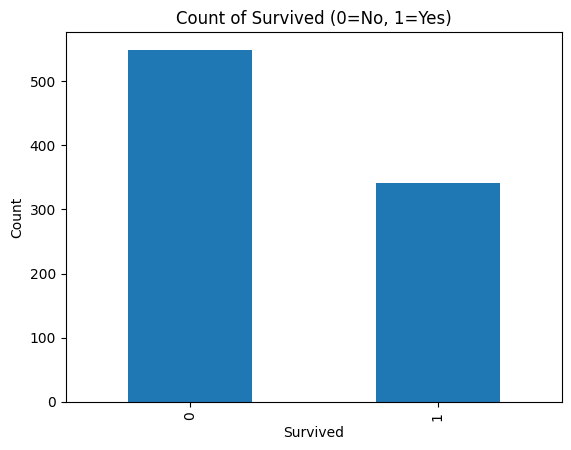

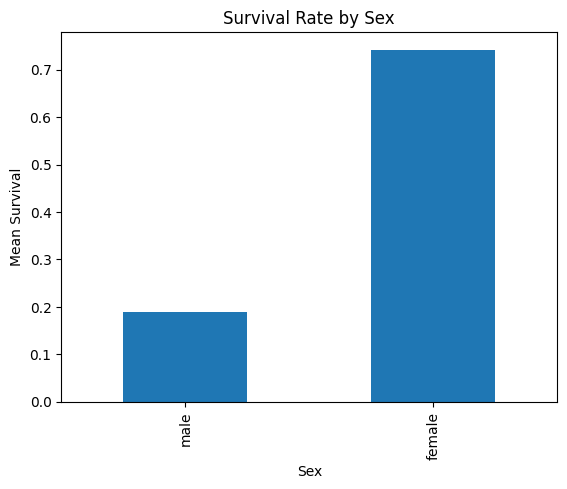

<Axes: ylabel='Frequency'>

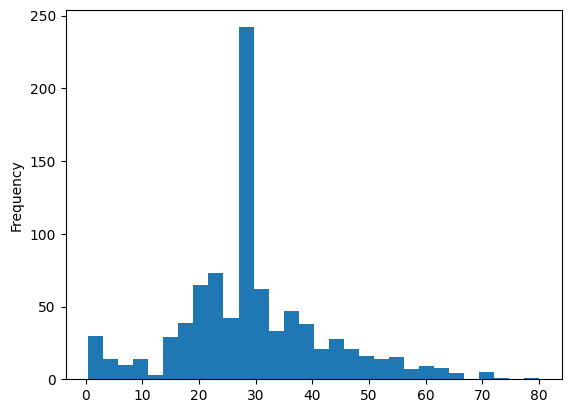

In [16]:
import matplotlib.pyplot as plt

# Count of Survived
df['Survived'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Survived (0=No, 1=Yes)')
plt.xlabel('Survived'); plt.ylabel('Count'); plt.show()
# Survival rate by Sex
(df.groupby('Sex')['Survived'].mean().sort_values()
   .plot(kind='bar'))
plt.title('Survival Rate by Sex')
plt.xlabel('Sex'); plt.ylabel('Mean Survival'); plt.show()
# Age distribution
df['Age'].dropna().plot(kind='hist', bins=30)
